# Lab 7

In [1]:
import re, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Oil Spill

In [115]:
dirtyBeach = 200
cleanUpCrewMiles = 5
overCost = 8000
initialCrew = 14000
adCrewsCost = 800
regCrewCost = 600

def optCost(adCrews):
    extraCost = 0
    weeksToClean = 200 / (5 * (1+adCrews))
    daysToClean = weeksToClean * 7
    
    if daysToClean % 1 != 0:
        daysToClean = (daysToClean//1) + 1
        
        
    if daysToClean > 13:
        extraCost = (8000 * (daysToClean - 13))
    cost = (daysToClean * 800)*(adCrews) + (14000 * adCrews) + (600 * daysToClean) + extraCost
    
    return cost

def derOptCost(adCrews):
    daysToClean = 200 / (cleanUpCrewMiles * (1+adCrews))
    cost = (daysToClean * adCrewsCost) + initialCrew
    return cost

def newton(f, df, x0, e):
    while abs(0 - f(x0)) > e:
        x0 = x0 - f(x0) / df(x0)
    return x0


Need to make the derivitive function for my original one. Then use newtons to determine the cost. 

I believe the optimal extra crews is 2.

Need to build the function to better understand what I am doing. 

458000.0 13


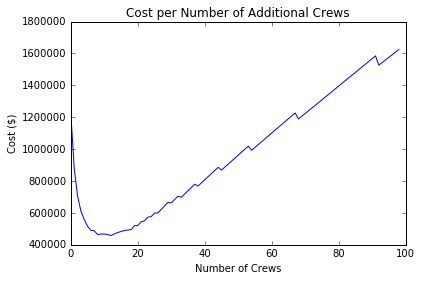

In [125]:
miles = 200
noCrewCost = optCost(0)

bestCost = noCrewCost
bestCrew = 0

bests = []

for i in range(1, 100):
    c = optCost(i)
    if c < bestCost:
        bestCost = c
        bestCrew = i
    bests.append(c)

    
print(bestCost, bestCrew)
b = np.array(bests)

plt.plot([x for x in range(len(bests))], bests)
plt.title("Cost per Number of Additional Crews")
plt.xlabel("Number of Crews")
plt.ylabel("Cost ($)")

So in the above code I compare the cost of having 1 --> 20000 aditional crews. The best cost begins with no crew cost, which is very high, because of the massive cost after 13 days. So the final cost that I get is 458,000, and the optimal amount of crews would be 13.

The way that I compute this is through using a function that takes the number of aditional crews to compute the number of days and total cost it would take to clean the beach. I found it very efficient to use this function. 

## TSP EXTENSIONS

In [51]:
class Tour():
    
    def __init__(self, size):
        self.size = size
        self.xs = np.random.randint(0, 99, size)
        self.ys = np.random.randint(0, 99, size)
        self.dis = []
        
    def clone(self):
        c = Tour(self.size)
        c.xs = np.copy(self.xs)
        c.ys = np.copy(self.ys)
        return c
    
    def distance(self):
        d = 0
        s = len(self.xs)
        for i in range(s):
            curD = np.sqrt((self.xs[i] - self.xs[(i + 1) % s]) ** 2 + 
                         (self.ys[i] - self.ys[(i + 1) % s]) ** 2)
            d += curD
            
            self.dis.append([i, curD])
            
            
        return d   
    
    def swap(self, i, j):
        t = self.xs[i]
        self.xs[i] = self.xs[j]
        self.xs[j] = t
        t = self.ys[i]
        self.ys[i] = self.ys[j]
        self.ys[j] = t 
        
    def interchange(self, i, j):
        if j < i:
            t = i
            i = j
            j = t    
        if (j - i) % 2 == 0:
            while i != j:
                self.swap(i, j)
                i += 1
                j -= 1
        else:
            while i < j:
                self.swap(i, j)
                i += 1
                j -= 1
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal')
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        ax.plot(self.xs, self.ys)
        ax.scatter(self.xs, self.ys)

        
def annealing(t, temp, decay, stop):
    cost = []
    badP = []
    while temp > stop:
        bd = t.distance()
        i, j = np.random.randint(0, t.size, 2)
        t.swap(i, j)
        nd = t.distance()
        delta = nd - bd
        if delta >= 0:
            p = np.exp(-delta / temp)
            if np.random.random() > p:
                #bad probability
                badP.append(p)
                t.swap(i, j)
        temp *= decay
        cost.append(t.distance())
    return cost, badP
        
        
def descent(tour):
    cost = []
    finished = False
    while not finished:
        d = tour.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = tour.size
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                tour.swap(i, j)
                od = tour.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                tour.swap(i, j)
        if not finished:
            tour.swap(best_i, best_j)
            cost.append(tour.distance())
    return cost

def newAnnealing(t, temp, decay, stop):
    cost = []
    badP = []
    while temp > stop:
        bd = t.distance()
        i, j = np.random.randint(0, (t.size - 1), 2)
        t.interchange(i, j)
        nd = t.distance()
        delta = nd - bd
        if delta >= 0:
            p = np.exp(-delta / temp)
            if np.random.random() > p:
                #bad probability
                badP.append(p)
                t.interchange(i, j)
        temp *= decay
        cost.append(t.distance())
    return cost, badP

def newDescent(tour):
    cost = []
    finished = False
    while not finished:
        d = tour.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = tour.size - 1
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                tour.interchange(i, j)
                od = tour.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                tour.interchange(i, j)
        if not finished:
            tour.interchange(best_i, best_j)
            cost.append(tour.distance())
    return cost

In [59]:
tsp = Tour(80)
tsp2 = tsp.clone()
tsp3 = tsp.clone()

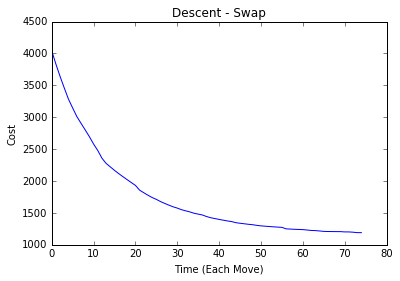

In [60]:
costList = descent(tsp2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([x for x in range(len(costList))], costList)
ax.set_title("Descent - Swap")
ax.set_xlabel("Time (Each Move)")
ax.set_ylabel("Cost")

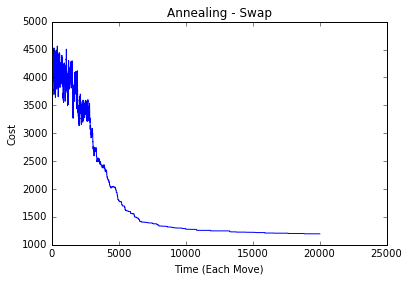

In [61]:
aCost, badP = annealing(tsp3, 500, .999, .000001)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([x for x in range(len(aCost))], aCost)
ax.set_title("Annealing - Swap")
ax.set_xlabel("Time (Each Move)")
ax.set_ylabel("Cost")

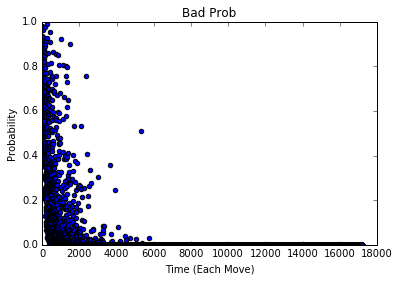

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, 18000)
ax.set_ylim(0, 1)
plt.scatter([x for x in range(len(badP))], badP)
ax.set_title("Bad Prob")
ax.set_xlabel("Time (Each Move)")
ax.set_ylabel("Probability")

### Interchange

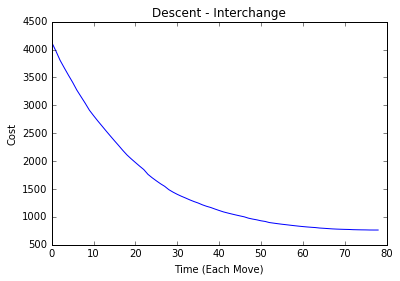

In [63]:
tsp4 = tsp.clone()
tsp5 = tsp.clone()

costList2 = newDescent(tsp4)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([x for x in range(len(costList2))], costList2)
ax.set_title("Descent - Interchange")
ax.set_xlabel("Time (Each Move)")
ax.set_ylabel("Cost")

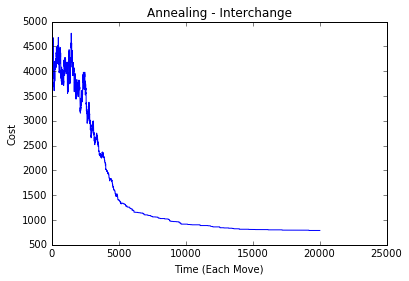

In [64]:
aCost2, badP2 = newAnnealing(tsp5, 500, .999, .000001)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([x for x in range(len(aCost2))], aCost2)
ax.set_title("Annealing - Interchange")
ax.set_xlabel("Time (Each Move)")
ax.set_ylabel("Cost")

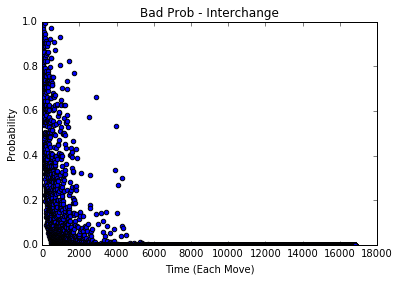

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, 18000)
ax.set_ylim(0, 1)
plt.scatter([x for x in range(len(badP2))], badP2)
ax.set_title("Bad Prob - Interchange")
ax.set_xlabel("Time (Each Move)")
ax.set_ylabel("Probability")

So as you can see from the graphs above, when implementing interchange the overall graphs look very similar. However, a closer look, shows that the ending costs are much lower than when just using swap. This is the case for both descent and annealing. Without using the interchange function, both graphs end well above 1000 for the cost of the tour. With the interchange in place, the totals fall below 1000. This shows that using interchange improves tour costs over time. 

## GA EXTENSIONS

In [176]:
import random

class Map():
    
    def __init__(self, size):
        self.size = size
        self.xs = np.random.randint(1, 99, size)
        self.ys = np.random.randint(1, 99, size)

class Tour():
    
    def __init__(self, m):
        self.m = m
        self.cities = np.arange(self.m.size)
        np.random.shuffle(self.cities)
        
    def clone(self):
        c = Tour(self.m)
        c.cities = np.copy(self.cities)
        return c
    
    def distance(self):
        d = 0
        for i in range(self.m.size):
            d += np.sqrt((self.m.xs[self.cities[i]] - self.m.xs[self.cities[(i + 1) % self.m.size]]) ** 2 + 
                         (self.m.ys[self.cities[i]] - self.m.ys[self.cities[(i + 1) % self.m.size]]) ** 2)
        return d        
    
    def swap(self, i, j):
        t = self.cities[i]
        self.cities[i] = self.cities[j]
        self.cities[j] = t
        
    def mutate(self):
        i, j = np.random.randint(0, self.m.size, 2)
        self.swap(i, j)
    
    def crossover(self, other):
        i, j = np.random.randint(0, self.m.size, 2)
        a = min(i, j)
        b = max(i, j)
        newa = -1 * np.ones(self.m.size, dtype=np.int)
        newb = -1 * np.ones(self.m.size, dtype=np.int)
        for x in range(a, b + 1):
            newa[x] = other.cities[x]
            newb[x] = self.cities[x]
        for t, v in ((newa, self), (newb, other)):
            c = 0
            i = 0
            while c < v.m.size:
                if t[c] != -1:
                    c += 1
                else:
                    if v.cities[i] not in t:
                        t[c] = v.cities[i]
                        c += 1
                    i += 1    
        self.cities = newa
        other.cities = newb
        
    def genEdge(self, arr, arr2):
        dic = {}
        i = 0
        for val in arr:
            if val not in dic:
                dic[val] = set()
            dic[val].add(arr[i - 1])
            dic[val].add(arr[(i + 1) % len(arr)])
        i = 0
        for val in arr2:
            if val not in dic:
                dic[val] = set()
            dic[val].add(arr2[i - 1])
            dic[val].add(arr2[(i + 1) % len(arr)])
        print(dic)
        return dic
        
    def edge(self, other):
        neighbor = {}
        i = 0
        otherC = other.cities.tolist()
        selfC = self.cities.tolist()
        
        newa = []

        neighbor = self.genEdge(selfC, otherC)
        
        parent = np.random.random()
        
        if parent >= .5:
            X = selfC[0]
        else:
            X = otherC[0]
        
        temp = neighbor
        
        while len(newa) < len(selfC):
            #print(neighbor.keys())
            newa.append(X)
            temp = self.remove(temp, X)
            
            if len(neighbor[X]) == 0:
                unUsed = [x for x in neighbor.keys() if x not in newa]
                Z = random.choice(unUsed)
            else:
                lis = neighbor[X]
                smallLen = 1000000
                bestval = []
                for val in lis:
                    if len(neighbor[val]) < smallLen:
                        bestval = [val]
                        smallLen = len(neighbor[val])
                    elif len(neighbor[val]) == smallLen:
                        bestval.append(val)
                if len(bestval) > 1:
                    Z = random.choice(bestval)
                else:
                    Z = bestval[0]
            X = Z
            print(newa)
        return newa
                
            
        print(neighbor)
        
    def remove(self, dic, val):
        newDic = {}
        tempArray = set()
        print(dic[val])
        for key in dic.keys():
            tempArray = dic[key]
            if val in dic[key]:
                tempArray = dic[key].remove(val)
                print(tempArray)
            newDic[key] = set(tempArray)
                
        return newDic
            
    
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal')
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        myx = []
        myy = []
        for i in range(self.m.size):
            myx.append(self.m.xs[self.cities[i]])
            myy.append(self.m.ys[self.cities[i]])
        ax.plot(myx, myy)
        ax.scatter(myx, myy)

In [177]:
psize = 200
size = 50
iter = 100
mutation_rate = 0.15

world = Map(size)
population = []
for p in range(psize):
    population.append(Tour(world))

In [24]:
def evoalg(pop, iterations):
    bestever = 0
    
    for i in range(iterations):
        
        # evaluate (use the distance function)
        
        # select (Tournament)
        newpop = []
        for p in range(len(pop)):
            a, b = np.random.randint(0, len(pop), 2)
            if pop[a].distance() < pop[b].distance():
                newpop.append(pop[a].clone())
            else:
                newpop.append(pop[b].clone())
        pop = newpop
        
        # crossover
        for p in range(0, len(pop), 2):
            pop[p].crossover(pop[p + 1])
        
        # mutation
        for p in range(len(pop)):
            if np.random.random() < mutation_rate:
                pop[p].mutate()

        best = pop[0].distance()
        bestn = 0
        ave = best
        for m in range(1, len(pop)):
            ave += pop[m].distance()
            if pop[m].distance() < best:
                best = pop[m].distance()
                bestn = m
        ave /= len(pop)
        #print(i, best, ave)      

    return bestn, pop

In [25]:
b, pop = evoalg(population, iter)

1534.6217919757798

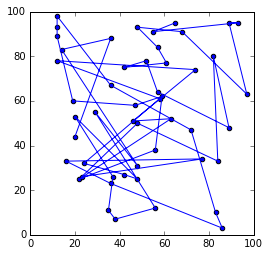

In [26]:
pop[b].plot()
pop[b].distance()

In [15]:
def evoalgEdge(pop, iterations):
    bestever = 0
    
    for i in range(iterations):
        
        # evaluate (use the distance function)
        
        # select (Tournament)
        newpop = []
        for p in range(2 * len(pop)):
            a, b = np.random.randint(0, len(pop), 2)
            if pop[a].distance() < pop[b].distance():
                newpop.append(pop[a].clone())
            else:
                newpop.append(pop[b].clone())
        pop = newpop
        
        # crossover
        newpop = []
        for p in range(0, len(pop), 2):
            newpop.append(pop[p].edge(pop[p + 1]))
        pop = newpop
        
        # mutation
        for p in range(len(pop)):
            if np.random.random() < mutation_rate:
                pop[p].mutate()

        best = pop[0].distance()
        bestn = 0
        ave = best
        for m in range(1, len(pop)):
            ave += pop[m].distance()
            if pop[m].distance() < best:
                best = pop[m].distance()
                bestn = m
        ave /= len(pop)
        #print(i, best, ave)      

    return bestn, pop

In [178]:
b, pop = evoalgEdge(population, iter)

{0: {36, 21, 14, 15}, 1: {36, 21, 14, 15}, 2: {36, 21, 14, 15}, 3: {36, 21, 14, 15}, 4: {36, 21, 14, 15}, 5: {36, 21, 14, 15}, 6: {36, 21, 14, 15}, 7: {36, 21, 14, 15}, 8: {36, 21, 14, 15}, 9: {36, 21, 14, 15}, 10: {36, 21, 14, 15}, 11: {36, 21, 14, 15}, 12: {36, 21, 14, 15}, 13: {36, 21, 14, 15}, 14: {36, 21, 14, 15}, 15: {36, 21, 14, 15}, 16: {36, 21, 14, 15}, 17: {36, 21, 14, 15}, 18: {36, 21, 14, 15}, 19: {36, 21, 14, 15}, 20: {36, 21, 14, 15}, 21: {36, 21, 14, 15}, 22: {36, 21, 14, 15}, 23: {36, 21, 14, 15}, 24: {36, 21, 14, 15}, 25: {36, 21, 14, 15}, 26: {36, 21, 14, 15}, 27: {36, 21, 14, 15}, 28: {36, 21, 14, 15}, 29: {36, 21, 14, 15}, 30: {36, 21, 14, 15}, 31: {36, 21, 14, 15}, 32: {36, 21, 14, 15}, 33: {36, 21, 14, 15}, 34: {36, 21, 14, 15}, 35: {36, 21, 14, 15}, 36: {36, 21, 14, 15}, 37: {36, 21, 14, 15}, 38: {36, 21, 14, 15}, 39: {36, 21, 14, 15}, 40: {36, 21, 14, 15}, 41: {36, 21, 14, 15}, 42: {36, 21, 14, 15}, 43: {36, 21, 14, 15}, 44: {36, 21, 14, 15}, 45: {36, 21, 14, 15

TypeError: 'NoneType' object is not iterable

1537.5661365810142

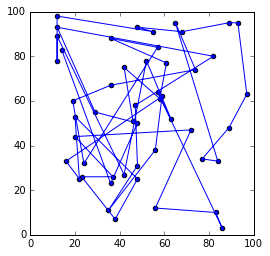

In [61]:
pop[b].plot()
pop[b].distance()

I was unable to get the function to work correctly. However I know that the edge recombo will greatly improve the tour distance. I ran out of time and will submit a revision. The part of my function that is not working is generation of the edges. It worked earlier an now it does not. I hope that in the code above in my function you can see the work that I have done. 

## Interstellar travel

In [131]:
import re, os
import numpy as np
ra = "([0-9]{2}h)"
light = "(\([0-9]*\))"

file = open("Unknown-4")

headers = file.readline().split(",")
regex = re.compile(ra)
lightReg = re.compile(light)

allCoor = []

for line in file:
    lineData = line.strip().split(",")
    tempCoor = []
    tempLight = []
        
    for i in range(len(lineData)):
        if re.search(regex, lineData[i]) != None:
            tempCoor.append(lineData[i])
            tempCoor.append(lineData[i+1])
            
        if re.search(lightReg, lineData[i]) != None:
            tempLight.append(lineData[i])
            
    if len(tempLight) > 0:
        light = tempLight[0].strip('"').split('.')
        if len(light) > 1:
            if int(light[0]) < 20:
                tempCoor.append(tempLight[0])
    else:
        tempCoor.append(allCoor[-1][-1])

    if len(tempCoor) == 3:        
        allCoor.append(tempCoor)


The code above gives me the three valuable points that I need to create the cartesian coordinates. I get right ascension, declination and the light years away from the Earth/Sun.

Below is a parser that takes these values and then removes extra characters. Like random spacing and extra numbers

In [132]:
numberedCoor = []
for pair in allCoor:
    i = 0
    tempPair = []
    for coor in pair:
        newCoor = coor.replace(u'\xa0', ',')
        newCoor = newCoor.strip('"').split(',')
        if i < 2:
            for j in range(len(newCoor)):
                newCoor[j] = newCoor[j][:-1]
        i += 1
        tempPair.append(newCoor)
      
    newLight = ''
    for char in tempPair[2][0]:
        if char != "(":
            newLight += char
        else:
            break
            
    light = []
    light.append(newLight)
    tempPair[2] = light
    numberedCoor.append(tempPair)

http://www.metric-conversions.org/length/lightyears-to-parsecs.htm

Above link is for Light Year, which is what the list in wikipedia gave me, to parsec, which is what the formula needs.
Not sure that I need it though.

First Column of the array is a list of the right ascension. The second is the declination, and the third is the distance in light years that will be converted. 

http://fmwriters.com/Visionback/Issue14/wbputtingstars.htm

Link above helped with the translation of the coordinates

Code below calculates the cartesian coordinates. 

In [133]:
import math

cartesian = []
for coor in numberedCoor:
    x = 0
    y = 0
    z = 0
    raDeg = 0
    deg = 0
    
    RA_Hour = float(coor[0][0]) + float(coor[0][1])/60 + float(coor[0][2])/3600
    raDeg = 15 * RA_Hour
    deg = (abs(float(coor[1][0][1:])) + float(coor[1][1])/60 + float(coor[1][2])/3600)
    
    if coor[1][0][0] != '+':
         deg *= -1
            
    parsec = float(coor[2][0]) * 0.30660
    
    
    x = (parsec * math.cos(deg)) * math.cos(raDeg)
    y = (parsec * math.cos(deg)) * math.sin(raDeg)
    z = parsec * math.sin(deg)
    
    cartesian.append([x, y, z])

cart = np.array(cartesian)

Class below was taken from the code example completed in class. It was slightly modified to handle a 3D tour. 

In [134]:
from mpl_toolkits.mplot3d import Axes3D
#from examle code on matplotlib website

class Tour3D():
    
    def __init__(self, array):
        self.array = array
        self.size = len(array)
        self.xs = array[:, 0]
        self.ys = array[:, 1]
        self.zs = array[:, 2]
        
    def clone(self):
        c = Tour3D(self.array)
        c.xs = np.copy(self.xs)
        c.ys = np.copy(self.ys)
        c.zs = np.copy(self.zs)
        return c
    
    def distance(self):
        d = 0
        s = len(self.xs)
        for i in range(s):
            first = np.sqrt((self.xs[i] - self.xs[(i + 1) % s]) ** 2 + 
                         (self.ys[i] - self.ys[(i + 1) % s]) ** 2)
            d += np.sqrt((first) + (self.zs[i] - self.zs[(i + 1) % s]) ** 2)
        return d
    
    def swap(self, i, j):
        t = self.xs[i]
        self.xs[i] = self.xs[j]
        self.xs[j] = t
        t = self.ys[i]
        self.ys[i] = self.ys[j]
        self.ys[j] = t
        t = self.zs[i]
        self.zs[i] = self.zs[j]
        self.zs[j] = t
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(-5, 5)
        ax.plot(self.xs, self.ys, self.zs)
        ax.scatter(self.xs, self.ys, self.zs)
        ax.set_title("Craft Travel Path")
        ax.set_xlabel("Distance in Parsecs")
        ax.set_ylabel("Distance in Parsecs")
        ax.set_zlabel("Distance in Parsecs")

In [135]:
t = Tour3D(cart)

Distance in Parsecs: 206.363814031


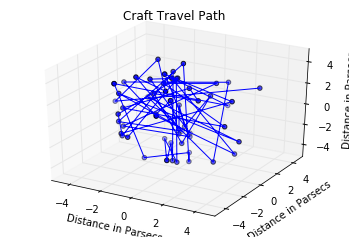

In [136]:
t.plot()
print("Distance in Parsecs: " + str(t.distance()))

Above is the closest stars and brown dwarfs to Earth. Below I will use several touring methods to determine the most effective method. 

ALL AXIS IN THE GRAPHS ABOVE AND BELOW ARE DISTANCE IN PARSECS!

### Descent

Distance in Parsecs:102.3485571


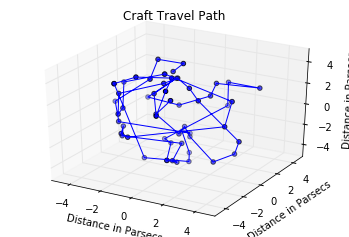

In [137]:
def descent(tour):
    finished = False
    while not finished:
        d = tour.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = tour.size
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                tour.swap(i, j)
                od = tour.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                tour.swap(i, j)
                
        if not finished:
            tour.swap(best_i, best_j)
            
t2 = t.clone()
descent(t2)
t2.plot()
print("Distance in Parsecs:" + str(t2.distance()))

### Annealing

Distance in Parsecs: 91.4428399642


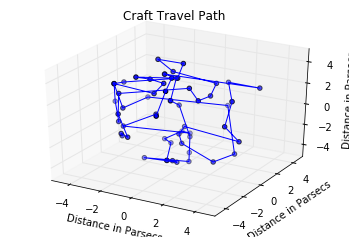

In [138]:
def annealing(t, temp, decay, stop):
    while temp > stop:
        bd = t.distance()
        i, j = np.random.randint(0, t.size, 2)
        t.swap(i, j)
        nd = t.distance()
        delta = nd - bd
        if delta >= 0:
            p = np.exp(-delta / temp)
            if np.random.random() > p:
                t.swap(i, j)
        temp *= decay
        
t3 = t.clone()

annealing(t3, 50, 0.999, 0.00001)


t3.plot()
print("Distance in Parsecs: " + str(t3.distance()))

Using annealing yeailded the most 'optimal' distance, compared to descent and not performing any actions. 

So we will take the parsecs and convert them back into light years. Then multiply by two because we travel half the speed of light on our travel. We assume that the ship we are in can go very close to the star, and the distance away is so minimal that it doesn't affect our data. And the movement around the star to get us to the next is also so minimal that it doesn't matter as well. 

In [139]:
lightYears = t3.distance() * 3.26156

#time = distance over speed
totalTime = lightYears / (1/2)
print(totalTime)

596.492618227


This will make the total time for our journey, 603.8544 light years to travel all of our closest neighbors. 